In [1]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib created a temporary cache directory at /jobfs/125320798.gadi-pbs/matplotlib-kl47i03i because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
# # Define the function and its derivative
# def f(x):
#     return (x - 3)**2

# def f_prime(x):
#     return 2 * (x - 3)

In [21]:
# Define the function and its derivative
def f(x):
    return (x - 3)**3 + x**2+3

def f_prime(x):
    return 3*(x - 3)**2 + 2*x

In [22]:
# Gradient Descent Algorithm
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point  # Initial guess
    path = [x]  # To store the path of optimization
    
    for _ in range(num_iterations):
        gradient = f_prime(x)
        x = x - learning_rate * gradient  # Update rule
        path.append(x)
        
    return x, path

In [27]:
# Updated Gradient Descent with smaller learning rate
starting_point = 10  # Still starting far from the minimum
learning_rate = 0.0001  # Smaller learning rate to prevent oscillations
num_iterations = 1000  # Increase the number of iterations

# Run gradient descent
minimum, path = gradient_descent(starting_point, learning_rate, num_iterations)

In [28]:
# Display the result
print(f"Minimum value of x: {minimum}")
print(f"f({minimum}) = {f(minimum)}")

Minimum value of x: 4.684065096382081
f(4.684065096382081) = 29.71660116445031


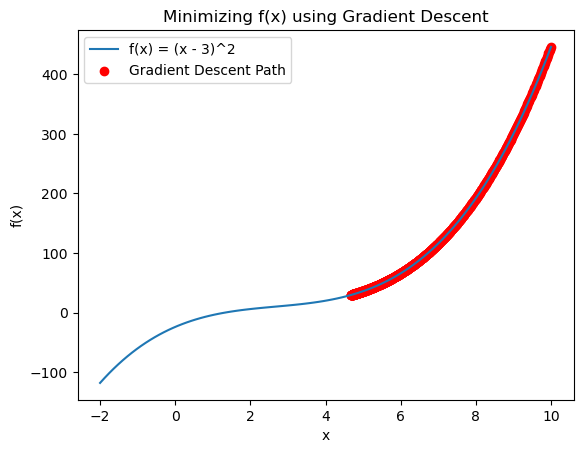

In [29]:
# Plotting the optimization process
x_vals = np.linspace(-2, 10, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = (x - 3)^2')
plt.scatter(path, [f(x) for x in path], color='red', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimizing f(x) using Gradient Descent')
plt.legend()
plt.show()


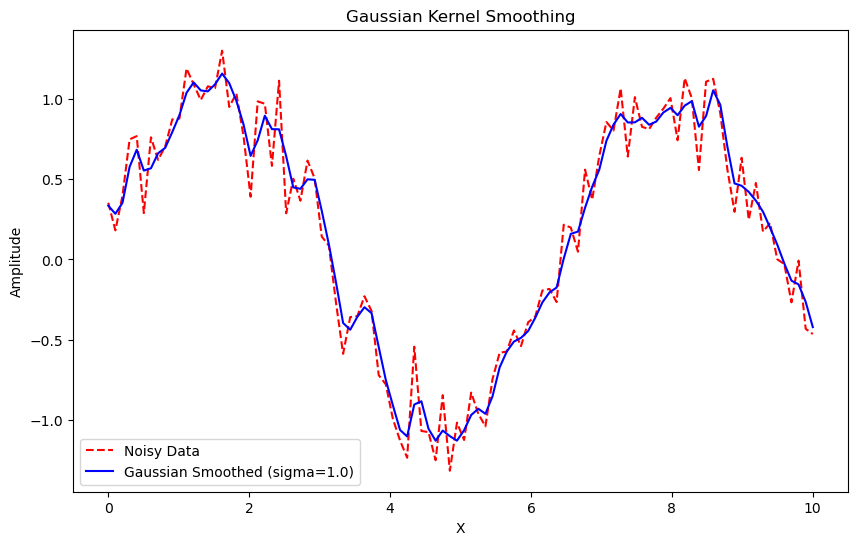

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Noisy Data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, x.shape)  # Signal + noise

# Step 2: Define Gaussian Kernel
def gaussian_kernel(sigma, kernel_size):
    """Generate a Gaussian kernel."""
    kernel_range = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    kernel = np.exp(-0.5 * (kernel_range / sigma) ** 2)
    kernel /= np.sum(kernel)  # Normalize the kernel
    return kernel

# Define kernel size and standard deviation
sigma = 1.0
kernel_size = 5
kernel = gaussian_kernel(sigma, kernel_size)

# Step 3: Convolve the Data with Gaussian Kernel
def convolve_with_kernel(data, kernel):
    """Convolve data with a given kernel."""
    kernel_size = len(kernel)
    padded_data = np.pad(data, (kernel_size // 2, kernel_size // 2), mode='edge')
    smoothed_data = np.convolve(padded_data, kernel, mode='valid')
    return smoothed_data

# Apply the convolution
y_smoothed = convolve_with_kernel(y, kernel)

# Step 4: Plot the Results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Noisy Data', linestyle='dashed', color='red')
plt.plot(x, y_smoothed, label=f'Gaussian Smoothed (sigma={sigma})', color='blue')
plt.title('Gaussian Kernel Smoothing')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
